In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mortality caused by road traffic injury (per 100,000 people)
# Mortality caused by road traffic injury, male (per 100,000 male population)
# Mortality caused by road traffic injury, female (per 100,000 female population)
df_mor = pd.read_csv('mortality_data.csv')

In [3]:
yearly_columns = [col for col in df_mor.columns if '[YR' in col]
for col in yearly_columns:
    df_mor[col] = pd.to_numeric(df_mor[col], errors='coerce')

df_mor.rename(columns={'Series Name':'series_name', 'Series Code':'series_code', 'Country Name':'country_name', 'Country Code':'country_code', '2000 [YR2000]':'2000', '2001 [YR2001]':'2001', '2002 [YR2002]':'2002','2003 [YR2003]':'2003', '2004 [YR2004]':'2004', '2005 [YR2005]':'2005', '2006 [YR2006]':'2006','2007 [YR2007]':'2007','2008 [YR2008]':'2008','2009 [YR2009]':'2009', '2010 [YR2010]':'2010', '2011 [YR2011]':'2011', '2012 [YR2012]':'2012', '2013 [YR2013]':'2013', '2014 [YR2014]':'2014', '2015 [YR2015]':'2015', '2016 [YR2016]':'2016', '2017 [YR2017]':'2017', '2018 [YR2018]':'2018', '2019 [YR2019]':'2019'}, inplace=True)
print(df_mor.tail())

                                           series_name series_code  \
798                                                NaN         NaN   
799                                                NaN         NaN   
800                                                NaN         NaN   
801  Data from database: Health Nutrition and Popul...         NaN   
802                           Last Updated: 12/16/2024         NaN   

    country_name country_code  2000  2001  2002  2003  2004  2005  ...  2010  \
798          NaN          NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
799          NaN          NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
800          NaN          NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
801          NaN          NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
802          NaN          NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

     2011  2012  2013  2014  2015  2016  2017  2018  2019  
798   NaN   NaN   NaN   NaN   NaN   Na

In [4]:
df_mor = df_mor.drop(index=range(798, 803))

In [5]:
serie_mor = df_mor.query("series_name == 'Mortality caused by road traffic injury (per 100,000 people)'").reset_index(drop=True)
ea_serie_mor = serie_mor.query("country_name == 'France' or country_name == 'Kenya' or country_name == 'Rwanda' or country_name == 'Somalia' or country_name == 'Tanzania' or country_name == 'Uganda' or country_name == 'Burundi'").reset_index(drop=True)

In [9]:
serie_mor1 = df_mor.query("series_name == 'Mortality caused by road traffic injury, male (per 100,000 male population)'").reset_index(drop=True)
ea_serie_mor1 = serie_mor1.query("country_name == 'France' or country_name == 'Kenya' or country_name == 'Rwanda' or country_name == 'Somalia' or country_name == 'Tanzania' or country_name == 'Uganda' or country_name == 'Burundi'").reset_index(drop=True)

In [10]:
serie_mor2 = df_mor.query("series_name == 'Mortality caused by road traffic injury, female (per 100,000 female population)'").reset_index(drop=True)
ea_serie_mor2 = serie_mor2.query("country_name == 'France' or country_name == 'Kenya' or country_name == 'Rwanda' or country_name == 'Somalia' or country_name == 'Tanzania' or country_name == 'Uganda' or country_name == 'Burundi'").reset_index(drop=True)

In [11]:
years = [col for col in ea_serie_mor.columns if col.isnumeric()]
df1 = pd.melt(ea_serie_mor, id_vars=["country_name"], value_vars=years, 
                  var_name="year", value_name="mortality")

In [12]:
years = [col for col in ea_serie_mor1.columns if col.isnumeric()]
df1_male = pd.melt(ea_serie_mor1, id_vars=["country_name"], value_vars=years, 
                  var_name="year", value_name="male_mortality")

In [13]:
years = [col for col in ea_serie_mor.columns if col.isnumeric()]
df1_female = pd.melt(ea_serie_mor2, id_vars=["country_name"], value_vars=years, 
                  var_name="year", value_name="female_mortality")

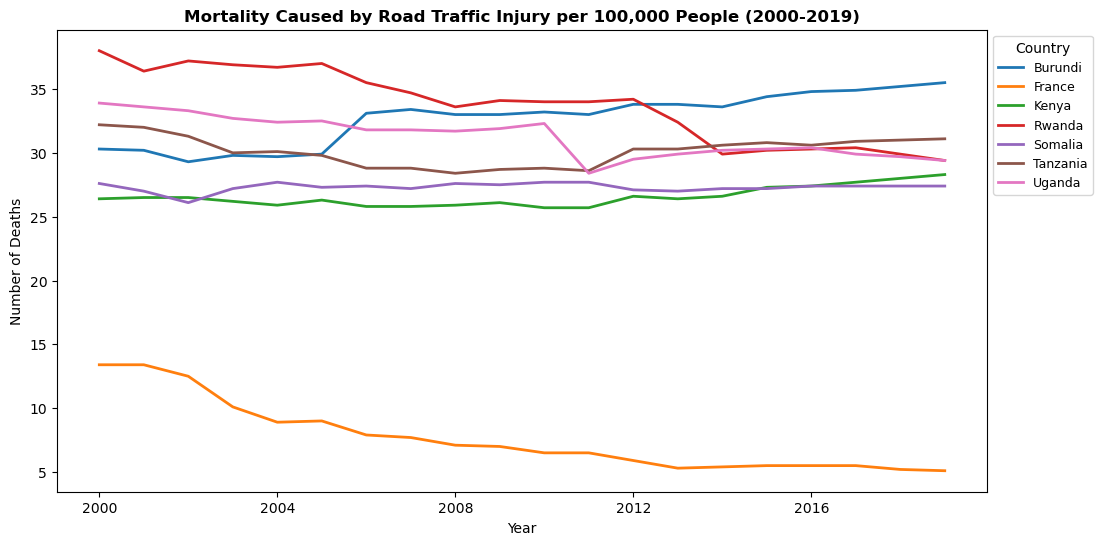

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df1, x="year", y="mortality", hue="country_name", palette='tab10', linewidth=2.0)
plt.title('Mortality Caused by Road Traffic Injury per 100,000 People (2000-2019)', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of Deaths', fontsize=10)
plt.xticks(ticks=df1['year'].unique()[::4])
plt.legend(title="Country", bbox_to_anchor=(1, 1), loc='upper left', fontsize=9, title_fontsize=10)
plt.savefig('mortality_lineplot1.png', dpi=400, bbox_inches='tight')
plt.show()

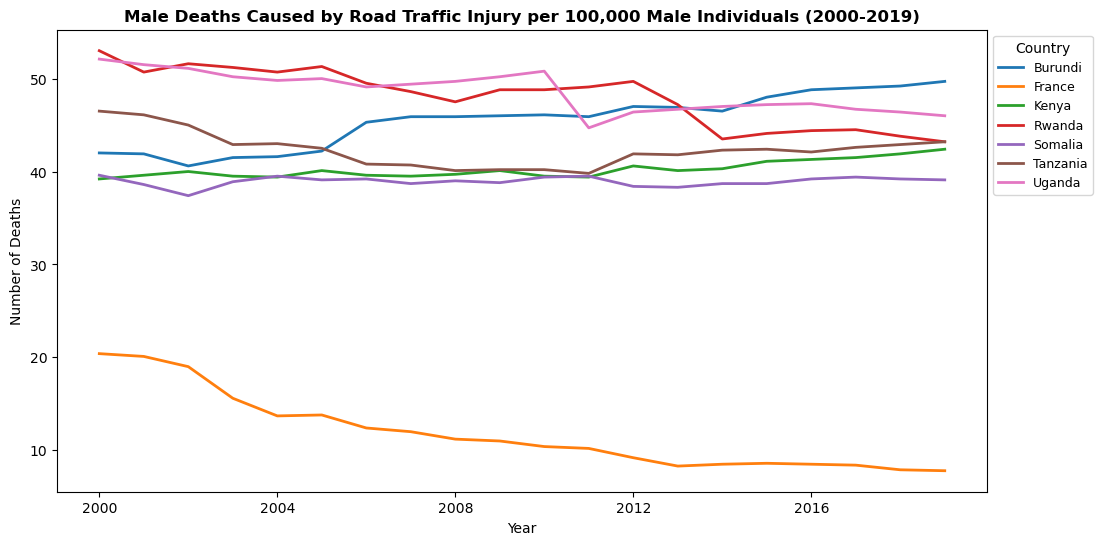

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df1_male, x="year", y="male_mortality", hue="country_name", palette='tab10', linewidth=2.0)
plt.title('Male Deaths Caused by Road Traffic Injury per 100,000 Male Individuals (2000-2019)', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of Deaths', fontsize=10)
plt.xticks(ticks=df1['year'].unique()[::4])
plt.legend(title="Country", bbox_to_anchor=(1, 1), loc='upper left', fontsize=9, title_fontsize=10)
plt.savefig('mortality_lineplot2.png', dpi=400, bbox_inches='tight')
plt.show()

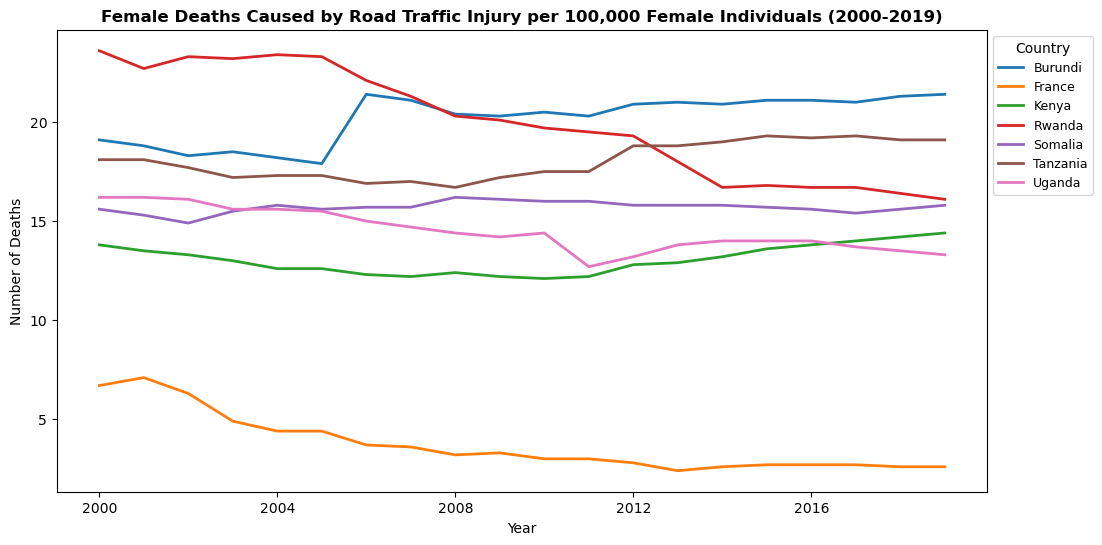

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df1_female, x="year", y="female_mortality", hue="country_name", palette='tab10', linewidth=2.0)
plt.title('Female Deaths Caused by Road Traffic Injury per 100,000 Female Individuals (2000-2019)', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of Deaths', fontsize=10)
plt.xticks(ticks=df1['year'].unique()[::4])
plt.legend(title="Country", bbox_to_anchor=(1, 1), loc='upper left', fontsize=9, title_fontsize=10)
plt.savefig('mortality_lineplot3.png', dpi=400, bbox_inches='tight')
plt.show()

In [18]:
df1_pivot = df1.pivot(index='year', columns='country_name', values='mortality').fillna(0)
print(df1_pivot.head())

country_name  Burundi  France  Kenya  Rwanda  Somalia  Tanzania  Uganda
year                                                                   
2000             30.3    13.4   26.4    38.0     27.6      32.2    33.9
2001             30.2    13.4   26.5    36.4     27.0      32.0    33.6
2002             29.3    12.5   26.5    37.2     26.1      31.3    33.3
2003             29.8    10.1   26.2    36.9     27.2      30.0    32.7
2004             29.7     8.9   25.9    36.7     27.7      30.1    32.4


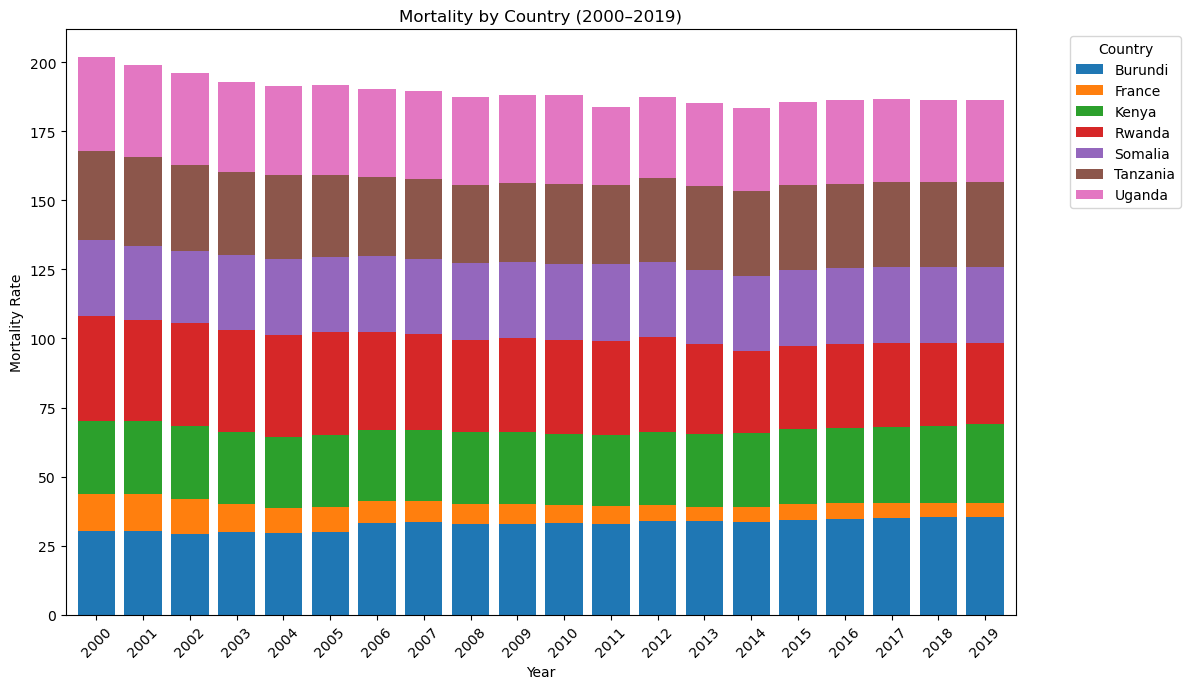

In [29]:
df1_pivot.plot(kind='bar', stacked=True, figsize=(12, 7), width=0.8)
plt.title("Mortality by Country (2000â€“2019)")
plt.xlabel("Year")
plt.ylabel("Mortality Rate")
plt.xticks(rotation=45)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [21]:
df1_grouped = df1.groupby(['country_name', 'year'])['mortality'].mean().reset_index(name='mortality')
print(df1_grouped.head())

  country_name  year  mortality
0      Burundi  2000       30.3
1      Burundi  2001       30.2
2      Burundi  2002       29.3
3      Burundi  2003       29.8
4      Burundi  2004       29.7


In [22]:
df1_male_grouped = df1_male.groupby(['country_name', 'year'])['male_mortality'].mean().reset_index(name='male_mortality')
df1_female_grouped = df1_female.groupby(['country_name', 'year'])['female_mortality'].mean().reset_index(name='female_mortality')

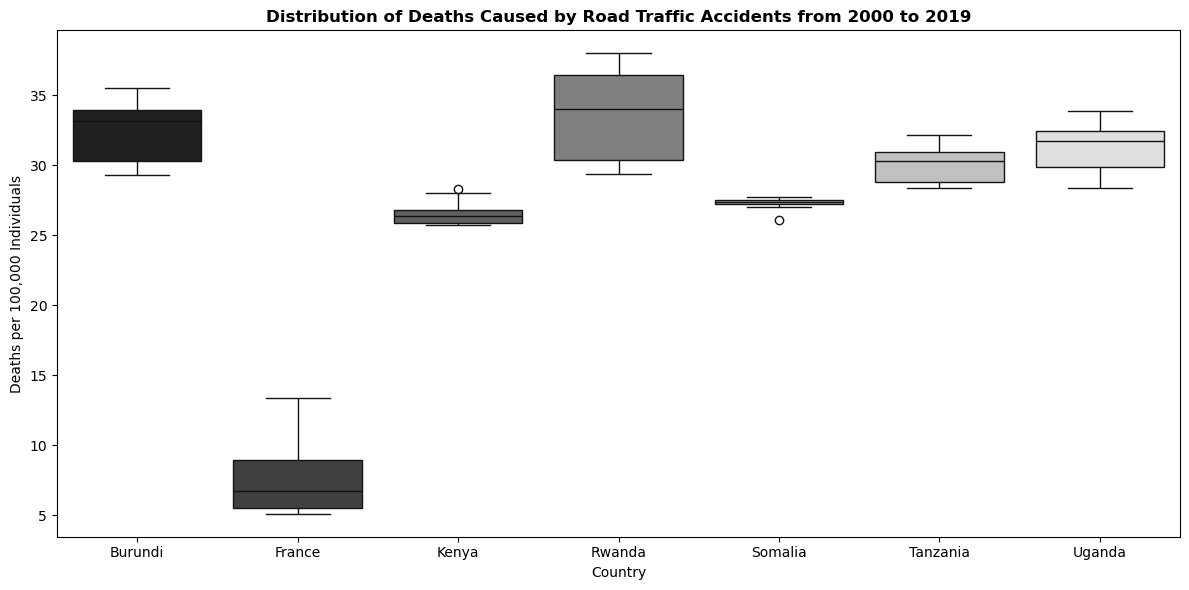

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1_grouped, x='country_name', y='mortality', hue='country_name', palette='gray')
plt.title('Distribution of Deaths Caused by Road Traffic Accidents from 2000 to 2019', fontsize=12, fontweight='bold')
plt.xlabel('Country', fontsize=10)
plt.ylabel('Deaths per 100,000 Individuals', fontsize=10)
plt.tight_layout()
plt.savefig('mortality_boxplot1.png', dpi=600, bbox_inches='tight')
plt.show()

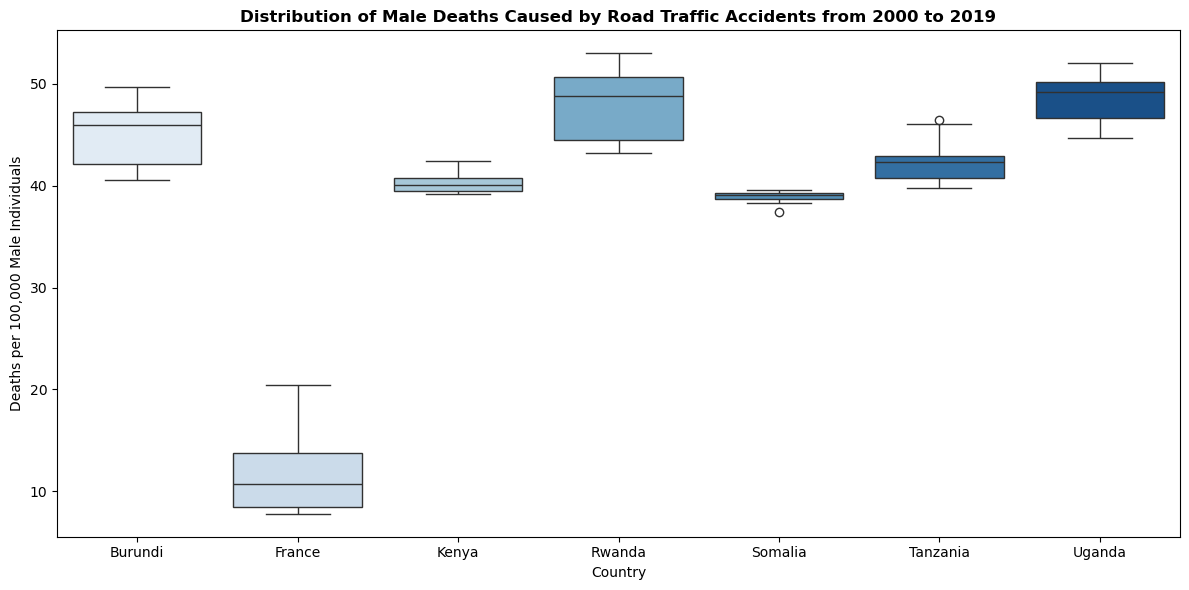

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1_male_grouped, x='country_name', y='male_mortality', hue='country_name', palette='Blues')
plt.title('Distribution of Male Deaths Caused by Road Traffic Accidents from 2000 to 2019', fontsize=12, fontweight='bold')
plt.xlabel('Country', fontsize=10)
plt.ylabel('Deaths per 100,000 Male Individuals', fontsize=10)
plt.tight_layout()
plt.savefig('mortality_boxplot2.png', dpi=600, bbox_inches='tight')
plt.show()

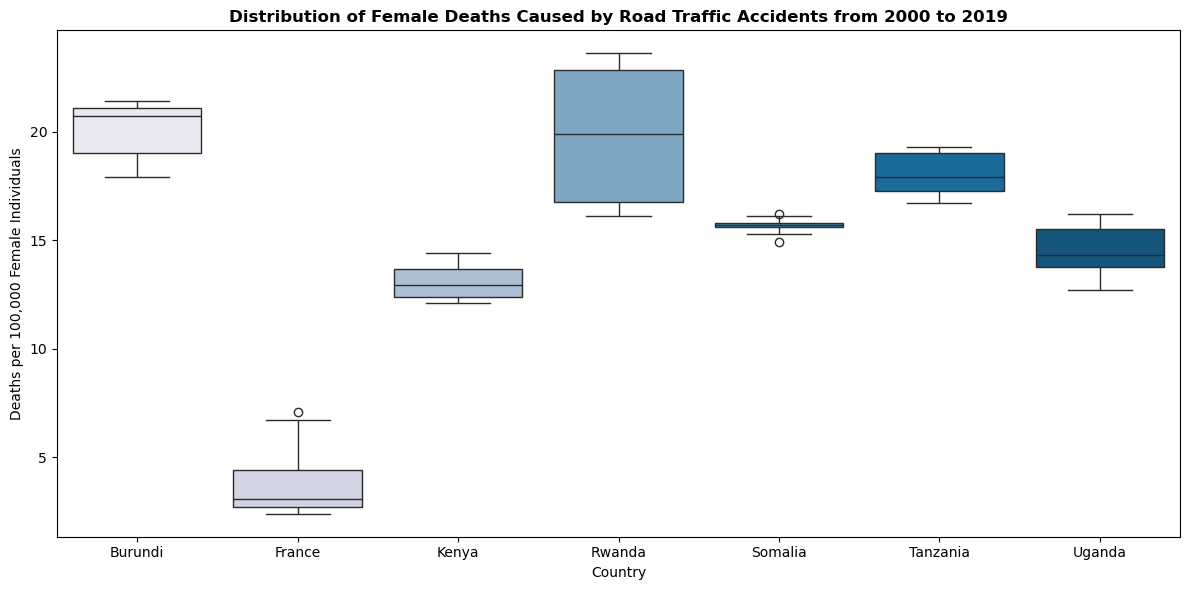

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1_female_grouped, x='country_name', y='female_mortality', hue='country_name', palette='PuBu')
plt.title('Distribution of Female Deaths Caused by Road Traffic Accidents from 2000 to 2019', fontsize=12, fontweight='bold')
plt.xlabel('Country', fontsize=10)
plt.ylabel('Deaths per 100,000 Female Individuals', fontsize=10)
plt.tight_layout()
plt.savefig('mortality_boxplot3.png', dpi=600, bbox_inches='tight')
plt.show()